# Part I - Analysis of Ford Gobike Service
## by Bello Shukurat A.

## Introduction
>  The Ford GoBike data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data set has 183412 rows and 16 columns. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

%matplotlib inline

In [2]:
# Loading the dataset
bike_data = pd.read_csv("fordgobike-tripdata.csv")
bike_data.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [3]:
print(bike_data.shape)
bike_data.info()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [4]:
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### The following issues were noted and resolved.

> <ul>
 <li>The dataset has some entries with missing values that will be dropped</li>
 <li>Converted the time column to DateTime</li>
 <li> The member_birth_year column was change to int64 from float</li>
</ul>
    

In [5]:
# creating a copy of the dataset
df_bikedata = bike_data.copy()


In [6]:
df_bikedata

duration_sec                start_time                  end_time  \
0              52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1              42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2              61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3              36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4               1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
...              ...                       ...                       ...   
183407           480  2019-02-01 00:04:49.7240  2019-02-01 00:12:50.0340   
183408           313  2019-02-01 00:05:34.7440  2019-02-01 00:10:48.5020   
183409           141  2019-02-01 00:06:05.5490  2019-02-01 00:08:27.2200   
183410           139  2019-02-01 00:05:34.3600  2019-02-01 00:07:54.2870   
183411           271  2019-02-01 00:00:20.6360  2019-02-01 00:04:52.0580   

        start_station_id                                start_station_name  \
0                   21.0  Montgomery St BART Station (Market St at 2nd St)   
1                   23.0                     The Embarcadero at Steuart St   
2                   86.0                           Market St at Dolores St   
3                  375.0                           Grove St at Masonic Ave   
4                    7.0                               Frank H Ogawa Plaza   
...                  ...                                               ...   
183407              27.0                           Beale St at Harrison St   
183408              21.0  Montgomery St BART Station (Market St at 2nd St)   
183409             278.0                            The Alameda at Bush St   
183410             220.0                       San Pablo Ave at MLK Jr Way   
183411              24.0                             Spear St at Folsom St   

        start_station_latitude  start_station_longitude  end_station_id  \
0                    37.789625              -122.400811            13.0   
1                    37.791464              -122.391034            81.0   
2                    37.769305              -122.426826             3.0   
3                    37.774836              -122.446546            70.0   
4                    37.804562              -122.271738           222.0   
...                        ...                      ...             ...   
183407               37.788059              -122.391865           324.0   
183408               37.789625              -122.400811            66.0   
183409               37.331932              -121.904888           277.0   
183410               37.811351              -122.273422           216.0   
183411               37.789677              -122.390428            37.0   

                                    end_station_name  end_station_latitude  \
0                     Commercial St at Montgomery St             37.794231   
1                                 Berry St at 4th St             37.775880   
2       Powell St BART Station (Market St at 4th St)             37.786375   
3                             Central Ave at Fell St             37.773311   
4                              10th Ave at E 15th St             37.792714   
...                                              ...                   ...   
183407           Union Square (Powell St at Post St)             37.788300   
183408                         3rd St at Townsend St             37.778742   
183409                     Morrison Ave at Julian St             37.333658   
183410                      San Pablo Ave at 27th St             37.817827   
183411                           2nd St at Folsom St             37.785000   

        end_station_longitude  bike_id   user_type  member_birth_year  \
0                 -122.402923     4902    Customer             1984.0   
1                 -122.393170     2535    Customer                NaN   
2                 -122.404904     5905    Customer             1972.0   
3                 -122.44429

In [7]:
#dropping missing data.
df_bikedata.dropna(inplace=True)

In [8]:
#convert start_time and end_time to datetime format
df_bikedata['start_time'] = pd.to_datetime(df_bikedata['start_time'])
df_bikedata['end_time'] = pd.to_datetime(df_bikedata['end_time'])

In [9]:
# convert column start_time to new colums
df_bikedata['weekday'] = df_bikedata['start_time'].dt.day_name() 
df_bikedata['day'] = df_bikedata['start_time'].dt.day
df_bikedata['hour'] = df_bikedata['start_time'].dt.hour

In [10]:
# Convert birth year from float to int
df_bikedata['member_birth_year'] = df_bikedata['member_birth_year'].astype('int64')
#df_bikedata['member_birth_year'].dtype
df_bikedata['member_birth_year']

0         1984
2         1972
3         1989
4         1974
5         1959
          ... 
183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, Length: 174952, dtype: int64

In [11]:
# convert duration in seconds to minutes
df_bikedata['duration_sec'] = df_bikedata['duration_sec']/60
df_bikedata.rename(columns = {'duration_sec' : 'duration_min'}, inplace=True)

In [12]:
df_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             174952 non-null  float64       
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [13]:
df_bikedata.describe()

duration_min  start_station_id  start_station_latitude  \
count  174952.000000     174952.000000           174952.000000   
mean       11.733379        139.002126               37.771220   
std        27.370082        111.648819                0.100391   
min         1.016667          3.000000               37.317298   
25%         5.383333         47.000000               37.770407   
50%         8.500000        104.000000               37.780760   
75%        13.150000        239.000000               37.797320   
max      1409.133333        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            174952.000000   174952.000000         174952.000000   
mean               -122.351760      136.604486             37.771414   
std                   0.117732      111.335635              0.100295   
min                -122.453704        3.000000             37.317298   
25%                -122.411901       44.000000             37.770407   
50%                -122.398279      101.000000             37.781010   
75%                -122.283093      238.000000             37.797673   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year            day  \
count          174952.000000  174952.000000      174952.000000  174952.000000   
mean             -122.351335    4482.587555        1984.803135      15.312337   
std                 0.117294    1659.195937          10.118731       8.033926   
min              -122.453704      11.000000        1878.000000       1.000000   
25%              -122.411647    3799.000000        1980.000000       8.000000   
50%              -122.397437    4960.000000        1987.000000      15.000000   
75%              -122.286533    5505.000000        1992.000000      22.000000   
max              -121.874119    6645.000000        2001.000000      28.000000   

                hour  
count  174952.000000  
mean       13.456165  
std         4.734282  
min         0.000000  
25%         9.000000  
50%        14.000000  
75%        17.000000  
max        23.000000

### What is the structure of your dataset?

> There are 183412 fordgobike trips in the cleaned dataset with 16 attributes/columns (duration_sec, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip duration_minutes, start_month, start_weekday, start_hour). Out of 16 specifications 9 are numerical(int or float), 2 are datetime, 4 are object type and 1 is boolean  dtype.

### What is/are the main feature(s) of interest in your dataset?

> <ul>
    <li>I'm most interested in figuring out about the factors/attributes in the dataset that affect rides duration (distance and timing). Others include
    <li> Who are the people who patronise Ford GoBike  </li>
    <li> When are most trips taken in terms of time of day, day of the week? </li>
    <li> How long does the average trip take? </li>
    <li> Does the above depend on if a user is a subscriber or customer? </li>
</ul>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that will support my investigations are duration_min, gender, usertype, birth_year.

## Univariate Exploration

### Question 1: What is the Distribution of Trips.

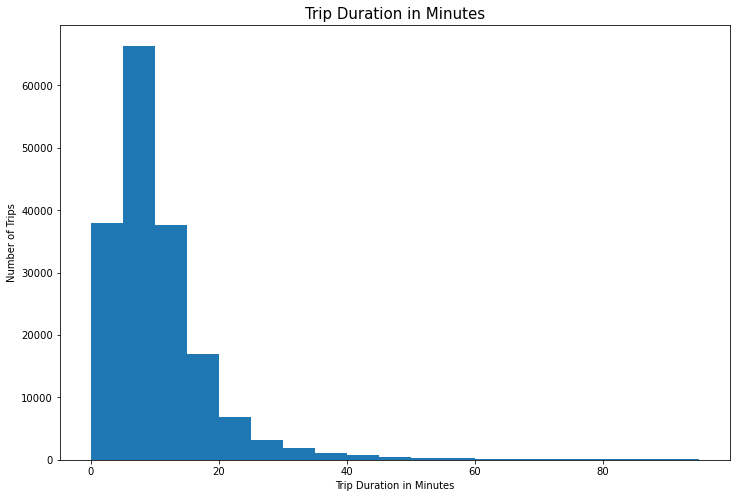

In [14]:
plt.figure(figsize=[12, 8])
plt.hist(data = df_bikedata, x = 'duration_min', bins = np.arange(0, 100, 5))
plt.title('Trip Duration in Minutes', fontsize=15)
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Number of Trips');

In [15]:
df_bikedata['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

> ***This chart depicts that most trips are between the 0-15min range. Also the avarage trip is about 12 minutes long.***

### Question 2: What is the daily bike ride duration each day of the week.

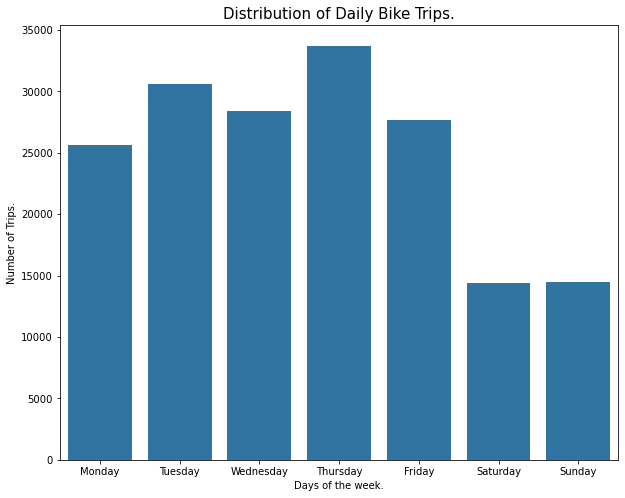

In [16]:
base_color = sb.color_palette()[0]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,8))
sb.countplot(data = df_bikedata, x = 'weekday', order = day_order, color = base_color)
plt.title("Distribution of Daily Bike Trips.", fontsize = 15)
plt.xlabel("Days of the week.")
plt.ylabel("Number of Trips.");

> ***We can infer that the rides are most used on Thursdays, and more trips are taken during the weekdays than the weekends.***

### Question 3: What is the Distribution of Users based on Subscription Types.

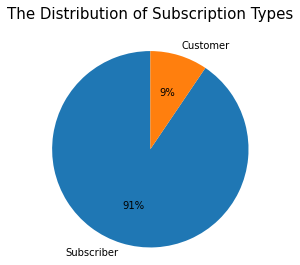

In [17]:
sub_count = df_bikedata['user_type'].value_counts()
plt.pie(sub_count, labels = sub_count.index, autopct = '%1.0f%%', startangle = 90)
plt.title("The Distribution of Subscription Types", fontsize = 15, y = 1.07)
plt.axis('square');


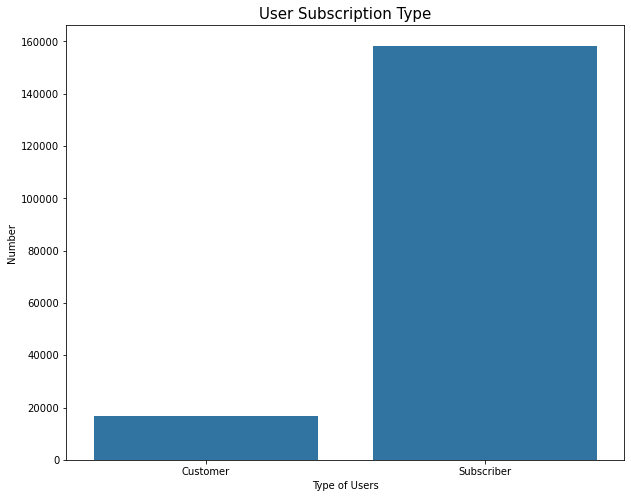

In [18]:
plt.figure(figsize = (10,8))
sb.countplot(data = df_bikedata, x ='user_type', color = base_color)
plt.title('User Subscription Type', fontsize = 15)
plt.ylabel('Number')
plt.xlabel('Type of Users');

> ***91% of the users are Subscribers.***

### Question 4: What is the Age Demographic of Users.

In [19]:
# calculate age of each user
def calculate_age(born):
    today = date.today()
    return today.year - born

df_bikedata['age'] = df_bikedata['member_birth_year'].map(calculate_age)

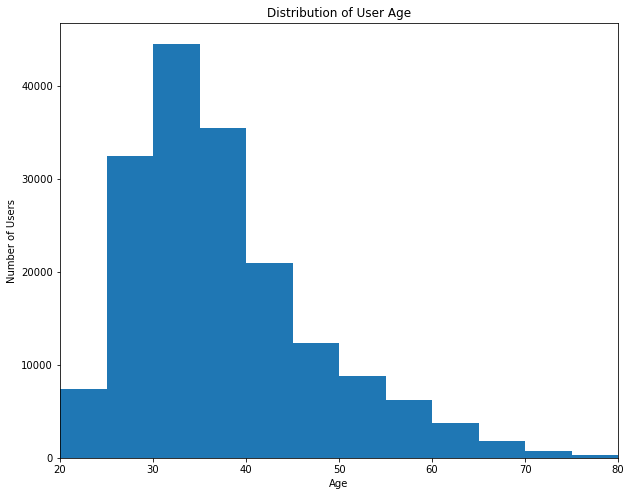

In [20]:
plt.figure(figsize = [10, 8])

binsize = 5
bins = np.arange(0, df_bikedata['age'].astype(float).max()+binsize, binsize)

plt.hist(data = df_bikedata, x = 'age', bins = bins)
plt.xlim(20, 80)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of User Age')
plt.show()


> ***The distribution is higher between the 25 to 35 mark, there is a steady decline as the age increases.***

### Question 5: What is the Distribution of Gender?

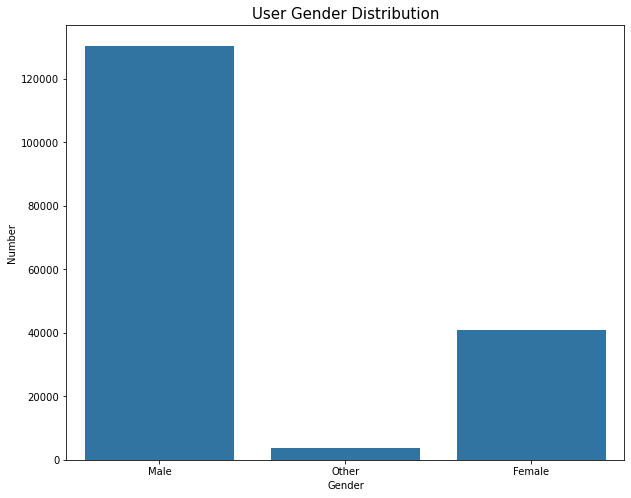

In [21]:
plt.figure(figsize = (10,8))
sb.countplot(data = df_bikedata, x = 'member_gender', color = base_color)
plt.title('User Gender Distribution', fontsize = 15)
plt.ylabel('Number')
plt.xlabel('Gender');

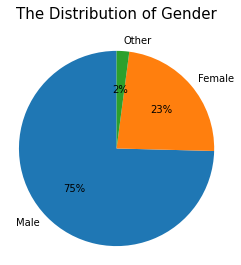

In [22]:
member_counts = df_bikedata['member_gender'].value_counts()
plt.pie(member_counts, labels = member_counts.index, autopct ='%1.0f%%', startangle = 90)
plt.title("The Distribution of Gender", fontsize = 15, y = 1.07)
plt.axis('square');


> ***There are more Males than Females, a ratio of about 75% to 23%, while others are 2%.***

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The male users represents over 120,000 with females representing a third of that amount. The distribution shows that most rides has a duration of 0-15 minutes and become fewer after the 20 minutes mark. Also, subscriber are very much higher than the customer, a ratio of 91% to 9%.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> <ul>
    <li> Quality issues like some columns dtype were not suitable for analysis were noted and changed.
    <li> Columns with missing data was dropped.
    <li> column start_time was used to derive new columns and duration_sec was changed to duration_min.
    <li> Birth year is converted by substracting the year from current year so this gives us a distibution for age.
    </ul>

## Bivariate Exploration

### Question 6: What is the relationship between Trip duration and Age?

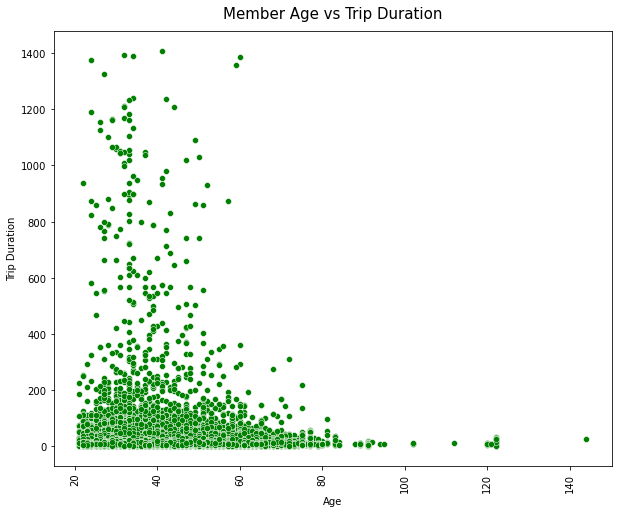

In [23]:
plt.figure(figsize=(10,8))
sb.scatterplot(data = df_bikedata, x ='age', y = 'duration_min', color = 'green')
plt.title('Member Age vs Trip Duration', fontsize=15, y=1.015)
plt.xlabel('Age')
plt.ylabel('Trip Duration')
plt.xticks(rotation = 90);


>  ***This shows that the younger age demographic has the highest trip duration and as the users get older, the trip duration decreases.***

### Question 7: What is the relationship between Trip duration and Gender?

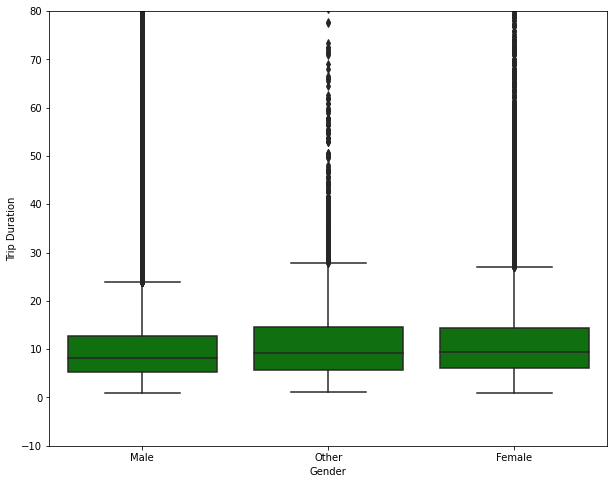

In [24]:
plt.figure(figsize = [10, 8])
sb.boxplot(data = df_bikedata, x = 'member_gender', y = 'duration_min', color = 'green')
plt.ylim([-10, 80])
plt.xlabel('Gender')
plt.ylabel('Trip Duration')
plt.show()

> ***Although the male gender accounts for 75% of the users, but the trip duration does not seem to be too affected by the user gender. The boxplot does show that female and other gender have a slightly higher trip duration than males.***

### Question 8: What is the relationship between Trip duration and User ?

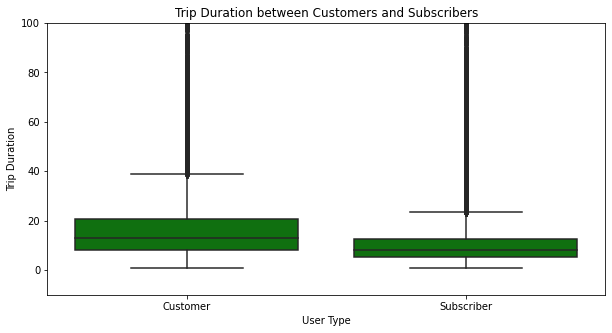

In [25]:
# A box plot showing comparisons between quatitative and categorical variables
plt.figure(figsize = [10, 5])
sb.boxplot(data = df_bikedata, x = 'user_type', y = 'duration_min', color = 'green')
plt.ylim(-10, 100)
plt.title('Trip Duration between Customers and Subscribers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration')
plt.show()

> ***The customer spend more time on a bike trip than subscribers, although the subscribers are higher in number.***

### Question 9: What is the relationship between Gender and User Type?

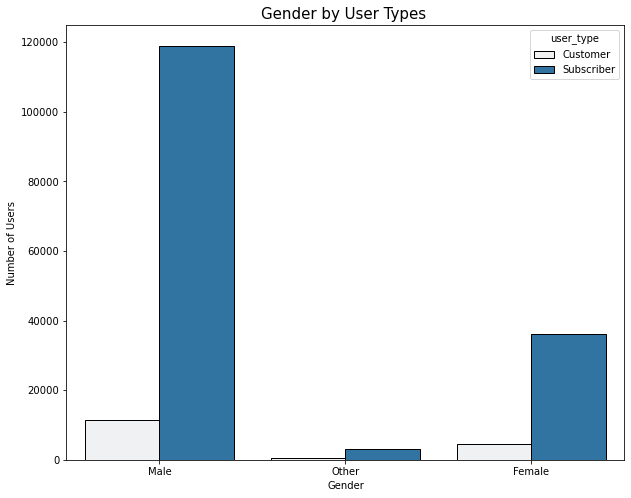

In [26]:
plt.figure(figsize = (10,8))
sb.countplot(data = df_bikedata, x = 'member_gender', color = base_color, hue = 'user_type', edgecolor = 'black')
plt.title('Gender by User Types ', fontsize = 15)
plt.ylabel('Number of Users')
plt.xlabel('Gender');

> ***Male Subscribers are still higher in all User Types.***

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationships observed between age and the length of the trip was inversely correlated. The trip duration decreased as the age increased.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Given the high disparity between subscribers and customers, where subscribers are the highest, it is interesting to note that the customers have a longer trip duration. Also, despite the low number of female users, they had a higher trip duration than males.

## Multivariate Exploration

### Question 10: What is the relationship between Trip duration, Gender and Days of the week?

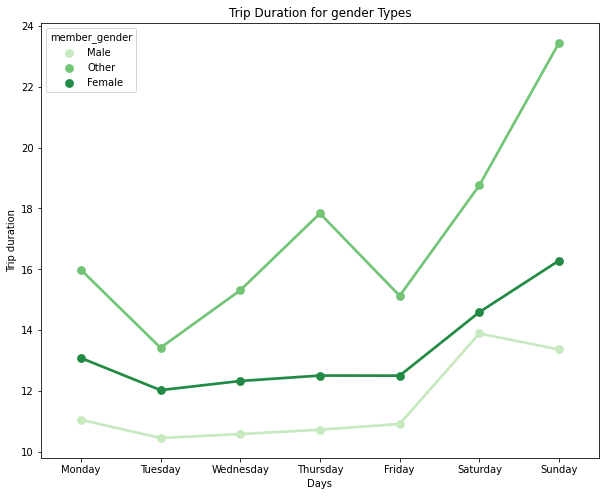

In [34]:
day_order = ['Monday','Tuesday','Wednesday','Thursday',
            'Friday','Saturday','Sunday']
plt.figure(figsize = [10, 8])
sb.pointplot(data = df_bikedata, x = 'weekday', y = 'duration_min', hue = 'member_gender', order = day_order, palette = 'Greens', ci=None)
plt.title('Trip Duration for gender Types')
plt.ylabel('Trip duration')
plt.xlabel('Days')
# plt.xticks(np.arange(0, 7, 1), day_order)
plt.show()

> ***Trip Duration for the 3 gender types increased in the weekends.***

### Question 10: What is the relationship between Trip duration, Gender and User type?

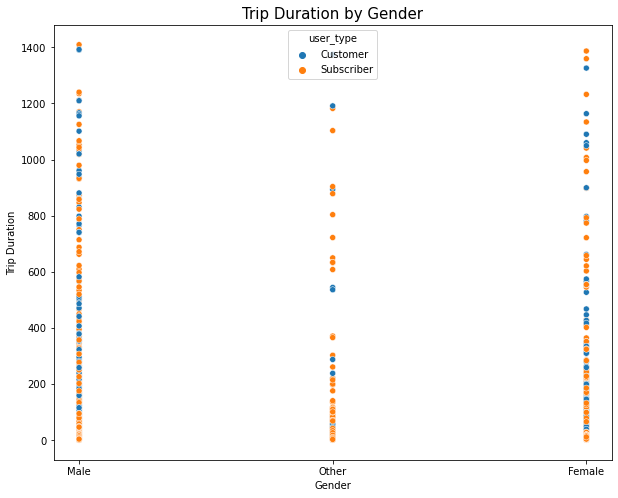

In [35]:
plt.figure(figsize = (10,8))
sb.scatterplot(data = df_bikedata, x = 'member_gender', y = 'duration_min', hue = 'user_type', ci =None)
plt.title('Trip Duration by Gender', fontsize=15)
plt.ylabel('Trip Duration')
plt.xlabel('Gender');

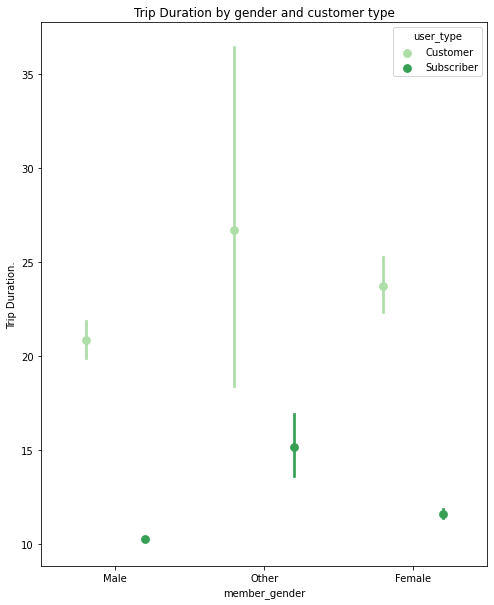

In [36]:
fig = plt.figure(figsize = [8,10])

ax = sb.pointplot(data = df_bikedata, x ='member_gender', y = 'duration_min', hue = 'user_type',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Trip Duration by gender and customer type')
plt.ylabel('Trip Duration.')
ax.set_yticklabels([],minor = True)
plt.show();


> For both subscribers and customers, the other gender  spent most duration followed by female and then male. The customers under other gender other have more trip duration than 'other' subscribers

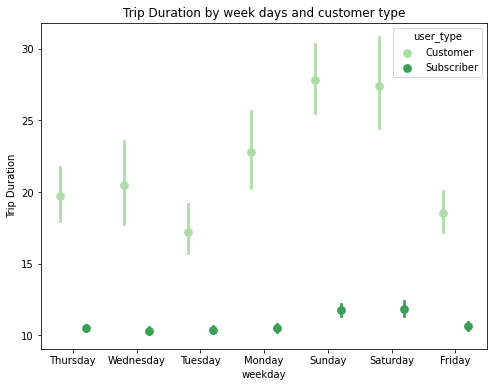

In [37]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_bikedata, x ='weekday', y = 'duration_min', hue = 'user_type',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Trip Duration by week days and customer type')
plt.ylabel('Trip Duration')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

> Customers travel very long distance during weekdays and longer on weekends. Whereas subscribers generally travel short distance with litle increase on weekends, however, it is not up to that of the customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate charts reinforced the earlier relationships that were observed. There is a noticeable spike in trip duration during the weekkend especially for other gender.

### Were there any interesting or surprising interactions between features?

> subcriber, who made up 91% of the user, do less number in ride and duration while customer, who are casual users did more in number and duration.

## Conclusions
>In the dataset, the average trip duration that the users took was around 15 minutes. The trips were mostly taken by males. 91% of the total trips were taken by Subscribers, which are members of the GoBike program. Also, the age group with the most trips was between 25-35 years old.
The Customers users (casual users) took more time in their rides than Subscribers.
The longest ride was also by a other gender customer.

## References
https://bytemeta.vip/repo/KC2016/Project-Ford-GoBike-System

https://www.kaggle.com/code/chirag02/ford-gobike-data-analysis/notebook

https://medium.datadriveninvestor.com/ford-gobike-system-data-exploration-fb5b229d4106